<a href="https://colab.research.google.com/github/meghanasri776/python_commands/blob/main/Assignment17_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part-1 Forest Fires Dataset Exercise

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
f=pd.read_csv("forestfires.csv")

In [ ]:
f.head(4)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [ ]:
f.tail(4)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,small


In [ ]:
f.shape

(517, 31)

In [ ]:
pd.set_option("display.max_columns",31)
f.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
f.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
f.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<Axes: >

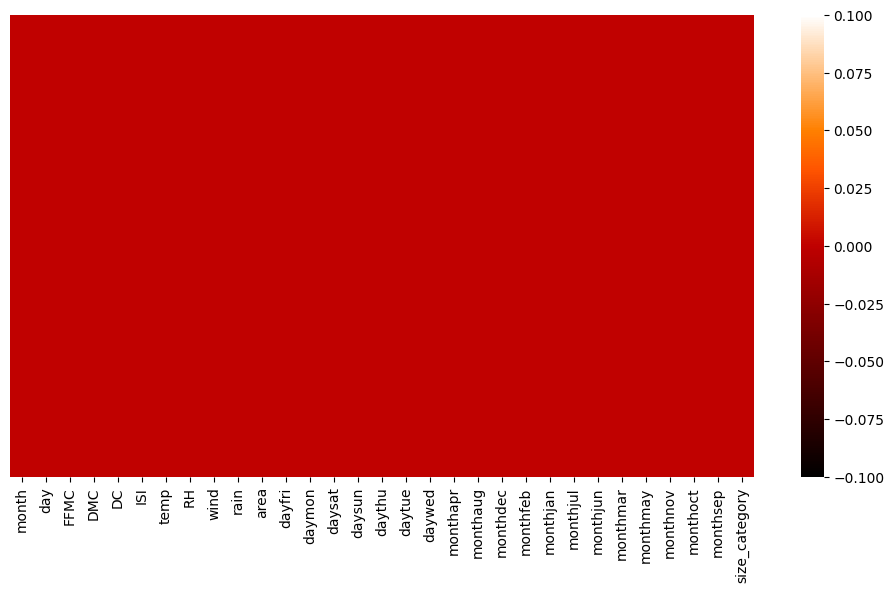

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(f.isna(), cmap =('gist_heat'), yticklabels=False)

In [ ]:
y_count = f.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

,size_category,counts
0,small,378
1,large,139


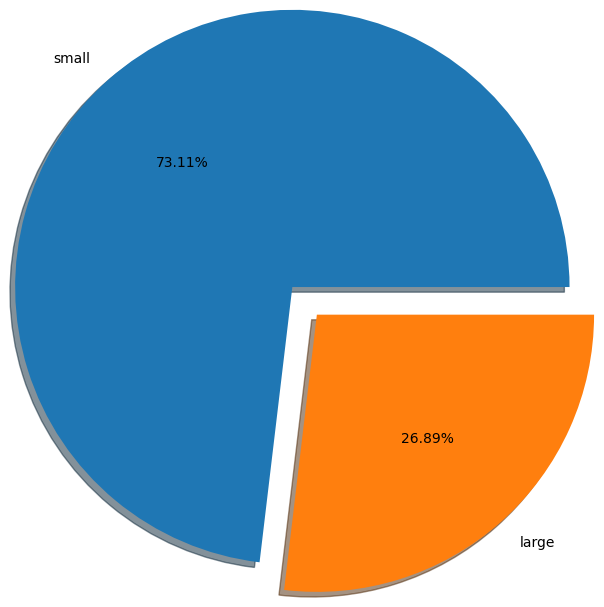

In [ ]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count

In [ ]:
month_ff = f.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_ff.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


In [ ]:
day_ff = f.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_ff

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.02, 'Num of fires on each day')

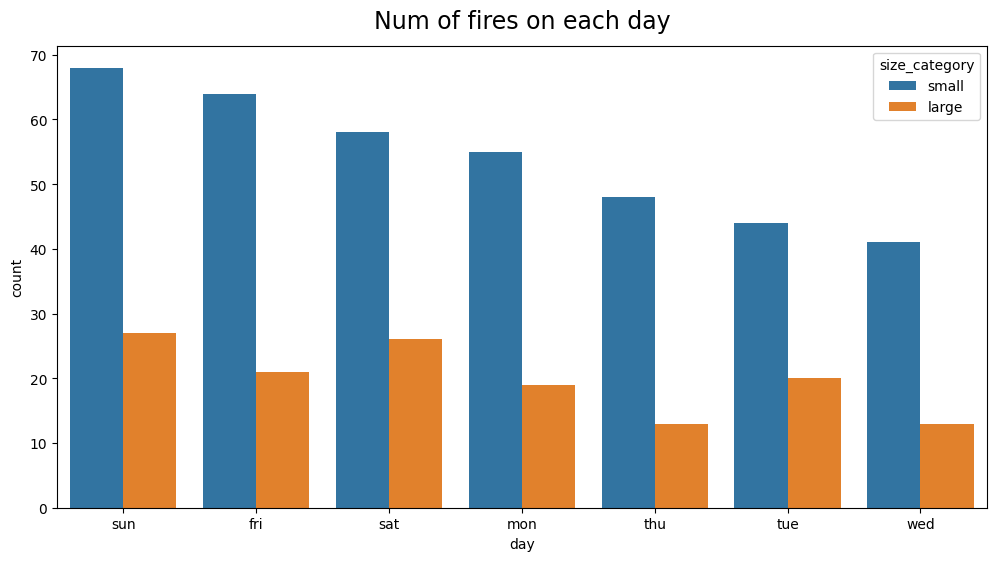

In [ ]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_ff)
plt.title("Num of fires on each day", fontsize=17, y=1.02)

In [ ]:
predictors = f.iloc[:,2:28]
target = f.iloc[:,-1]

In [ ]:
predictors, target

(     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  daymon  \
 0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1       0   
 1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0       0   
 2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0       0   
 3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1       0   
 4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0       0   
 ..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...     ...   
 512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0       0   
 513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0       0   
 514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0       0   
 515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0       0   
 516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0       0   
 
      daysat  daysun  daythu  daytue  daywed  mont

In [ ]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
fires = norm_func(predictors)
fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating train and testing data for model validation

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25, stratify = target)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((387, 26), (387,), (130, 26), (130,))

Building a SVC model for different kernels

In [ ]:
clf1=SVC(kernel='poly',gamma=0.001)
clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 99.23076923076923


array([[35,  0],
       [ 1, 94]])

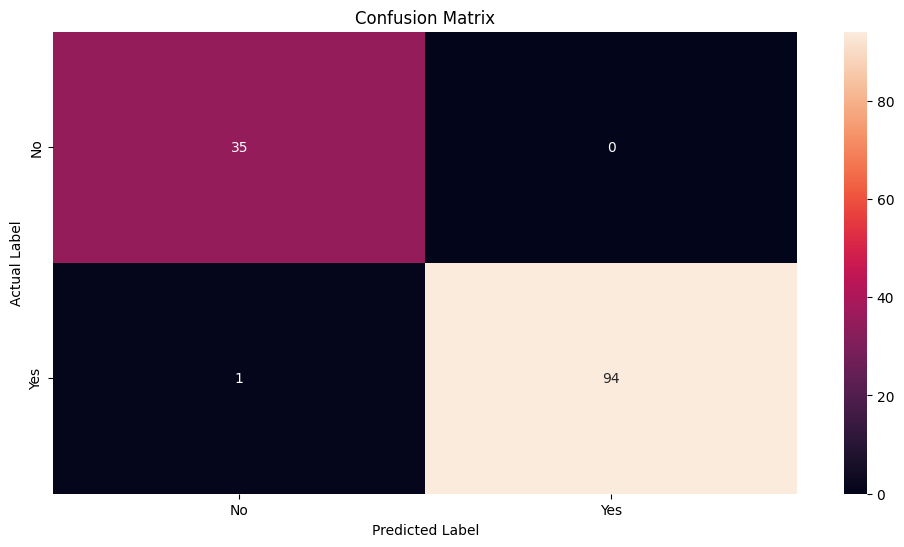

In [ ]:
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Gridsearch CV to find the best hyper parameter fro rbf kernel

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[15,14,13,12,11,10,0.1,0.001] }] # regularization of the parameter
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.8914304993252362)

In [ ]:
clf1=SVC(kernel='rbf',gamma=0.0001,C=15) # kernel="linear","rbf","polynomial"

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 96.15384615384616


array([[30,  5],
       [ 0, 95]])

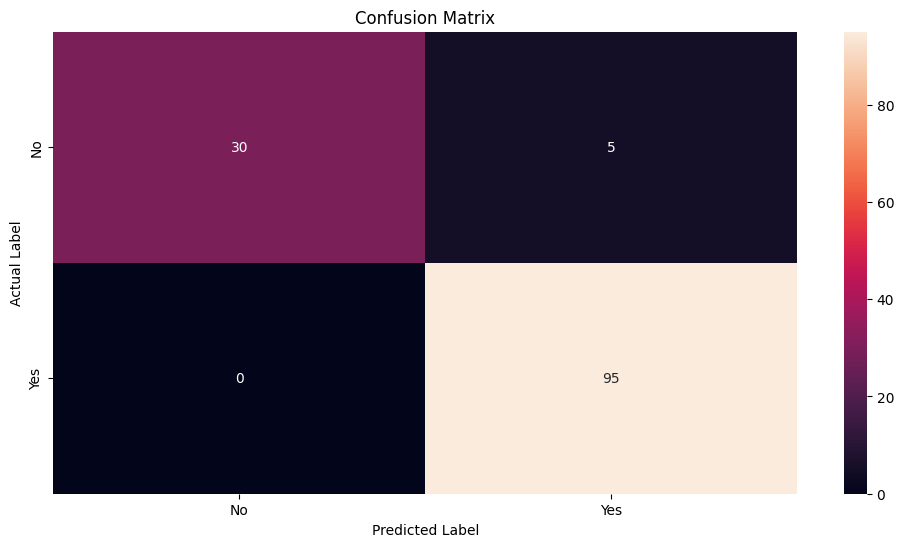

In [ ]:
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Gridsearch CV to find the best hyper parameter for linear kernel

In [ ]:
clf = SVC()
param_grid = [{'kernel':['poly'],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[15,14,13,12,11,10,0.1,0.001] }] # regularization of the parameter
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['poly']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 13, 'gamma': 0.0001, 'kernel': 'poly'}, 0.976855600539811)

In [ ]:
clf1=SVC(kernel='poly',gamma=0.0001,C=15) # kernel="linear","rbf","polynomial"

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 100.0


array([[35,  0],
       [ 0, 95]])

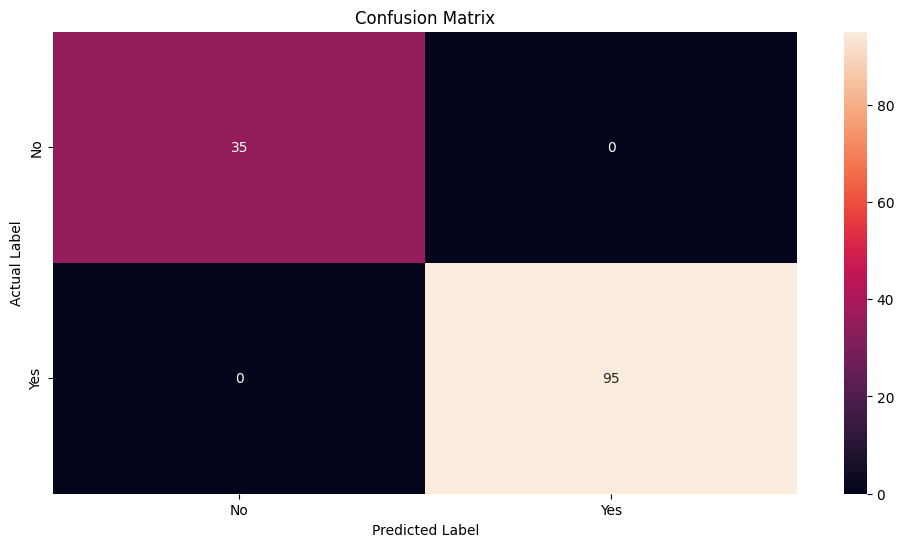

In [ ]:
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Comparing all the models, final model is found to be more accurate.

Preparing a classification model using SVM for salary data

Part-2 Salary Dataset Exercise.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("SalaryData_Train(1).csv")
test=pd.read_csv("SalaryData_Test(1).csv")

In [ ]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002 entries, 0 to 9001
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            9002 non-null   int64  
 1   workclass      9002 non-null   object 
 2   education      9002 non-null   object 
 3   educationno    9002 non-null   int64  
 4   maritalstatus  9002 non-null   object 
 5   occupation     9002 non-null   object 
 6   relationship   9002 non-null   object 
 7   race           9002 non-null   object 
 8   sex            9001 non-null   object 
 9   capitalgain    9001 non-null   float64
 10  capitalloss    9001 non-null   float64
 11  hoursperweek   9001 non-null   float64
 12  native         9001 non-null   object 
 13  Salary         9001 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 984.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train.shape

(9002, 14)

In [ ]:
test.shape

(15060, 14)

In [ ]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,9002.000000,9002.000000,9001.000000,9001.000000,9001.000000
mean,38.341480,10.112197,1099.572825,89.647928,41.048328
std,13.095719,2.527807,7475.758444,403.676355,11.862658
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2824.000000,99.000000


In [ ]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [ ]:
import pandas as pd
train.dropna(subset=['sex','capitalgain','capitalloss','hoursperweek','native','Salary'], inplace=True)
print(train)

      age          workclass      education  educationno        maritalstatus  \
0      39          State-gov      Bachelors           13        Never-married   
1      50   Self-emp-not-inc      Bachelors           13   Married-civ-spouse   
2      38            Private        HS-grad            9             Divorced   
3      53            Private           11th            7   Married-civ-spouse   
4      28            Private      Bachelors           13   Married-civ-spouse   
...   ...                ...            ...          ...                  ...   
8996   61            Private   Some-college           10   Married-civ-spouse   
8997   24            Private      Bachelors           13        Never-married   
8998   29            Private   Some-college           10        Never-married   
8999   17            Private           10th            6        Never-married   
9000   27            Private        HS-grad            9   Married-civ-spouse   

              occupation   

In [ ]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<Axes: >

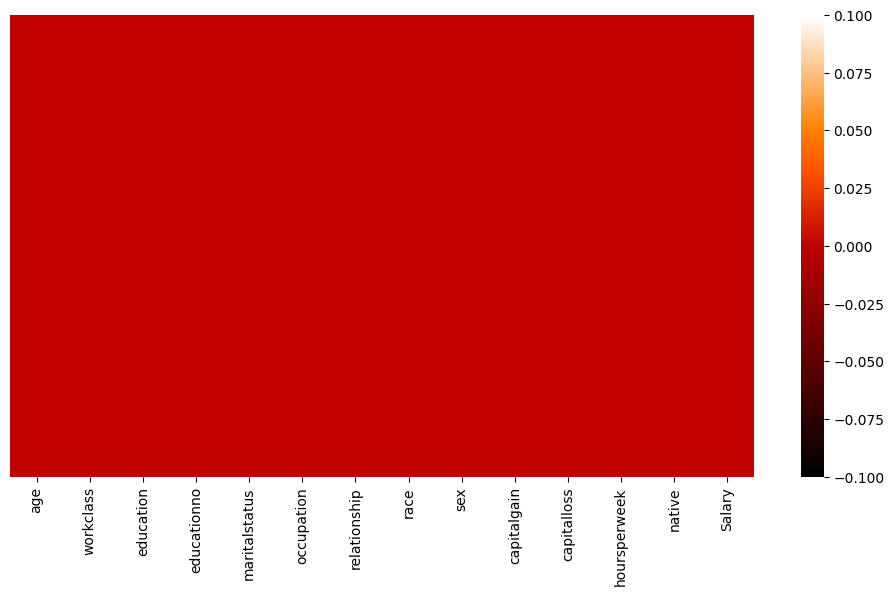

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(train.isna(), cmap =('gist_heat'), yticklabels=False)

<Axes: >

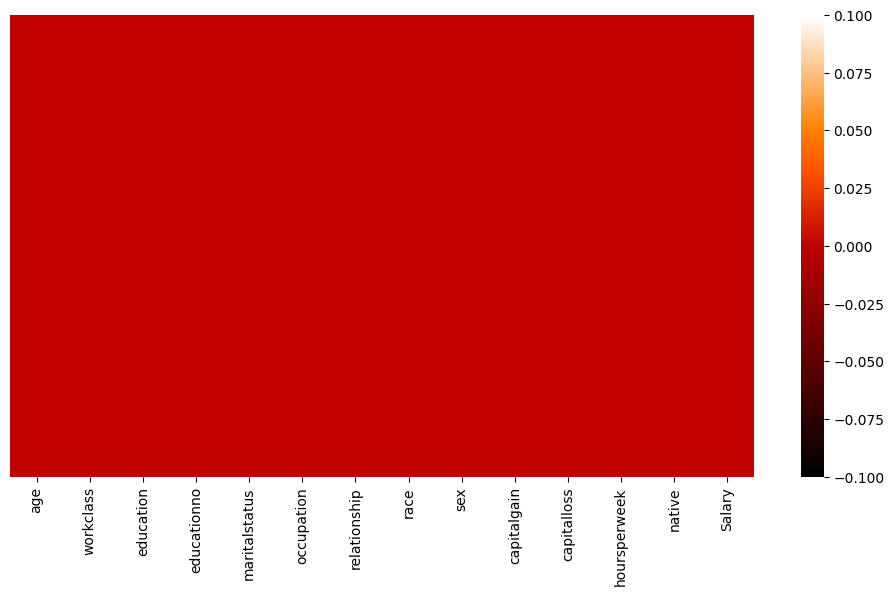

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(test.isna(), cmap =('gist_heat'), yticklabels=False)

In [ ]:
train['Salary'].value_counts()

 <=50K    6796
 >50K     2205
Name: Salary, dtype: int64

In [ ]:
test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [ ]:
pd.crosstab(train['occupation'],train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1005,136
Armed-Forces,2,0
Craft-repair,893,260
Exec-managerial,600,566
Farming-fishing,256,27
Handlers-cleaners,358,26
Machine-op-inspct,516,77
Other-service,939,41
Priv-house-serv,36,0


<Axes: xlabel='occupation'>

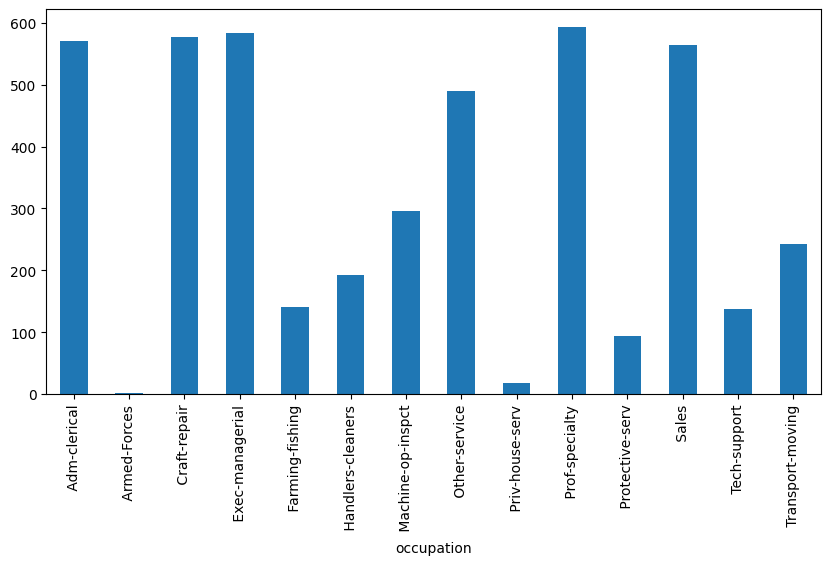

In [ ]:
pd.crosstab(train['Salary'],train['occupation']).mean().plot(kind='bar',figsize=(10,5))

In [ ]:
pd.crosstab(train['workclass'],train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,161,96
Local-gov,452,165
Private,5211,1435
Self-emp-inc,138,184
Self-emp-not-inc,555,217
State-gov,277,108
Without-pay,2,0


<Axes: xlabel='workclass'>

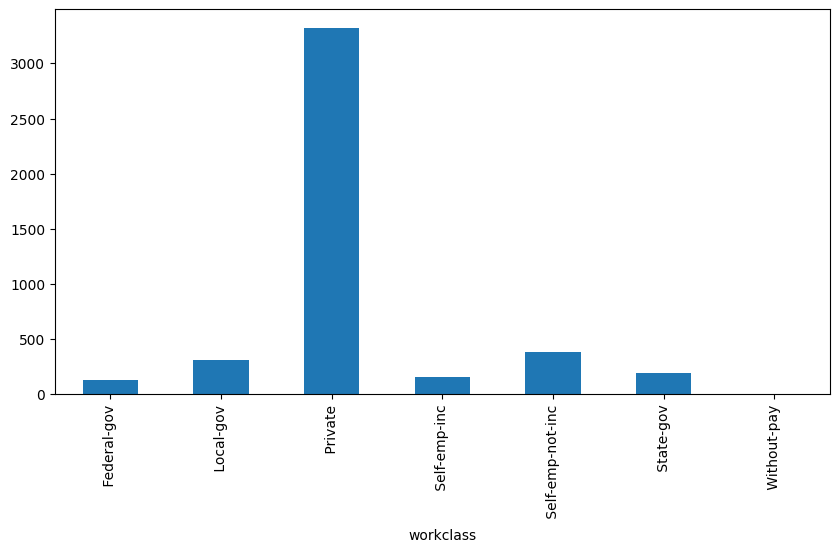

In [ ]:
pd.crosstab(train['Salary'],train['workclass']).mean().plot(kind='bar',figsize=(10,5))

In [ ]:
pd.crosstab(train['workclass'],train['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,81,2,19,47,1,2,4,12,0,44,9,6,21,9
Local-gov,97,0,37,61,10,9,2,59,0,214,83,3,9,33
Private,852,0,894,782,119,367,560,818,36,644,57,905,218,394
Self-emp-inc,8,0,27,117,15,1,6,8,0,42,0,88,1,9
Self-emp-not-inc,22,0,160,113,134,4,17,44,0,110,3,125,9,31
State-gov,81,0,16,46,2,1,4,39,0,131,36,1,18,10
Without-pay,0,0,0,0,2,0,0,0,0,0,0,0,0,0


<Axes: xlabel='workclass'>

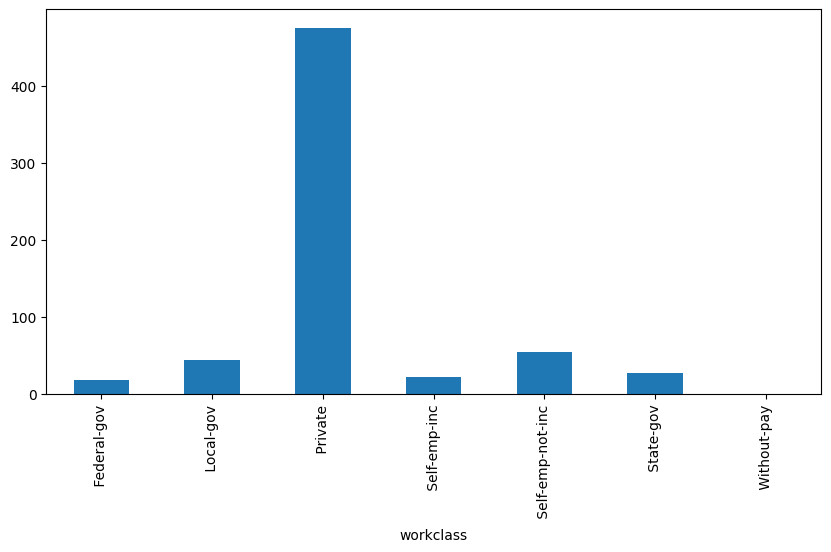

In [ ]:
pd.crosstab(train['occupation'],train['workclass']).mean().plot(kind='bar',figsize=(10,5))

<Axes: xlabel='sex'>

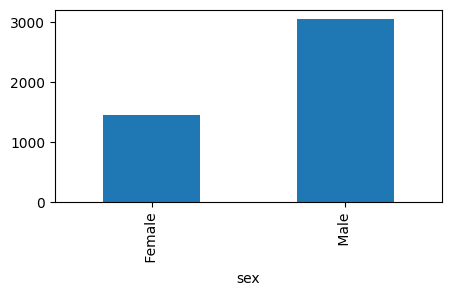

In [ ]:
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar',figsize=(5,2.5))

<Axes: xlabel='relationship'>

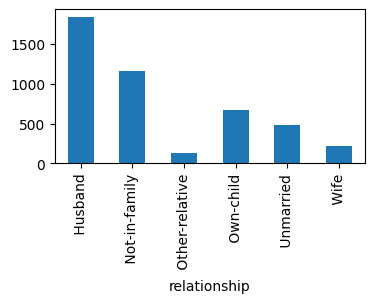

In [ ]:
pd.crosstab(train['Salary'],train['relationship']).mean().plot(kind='bar',figsize=(4,2))

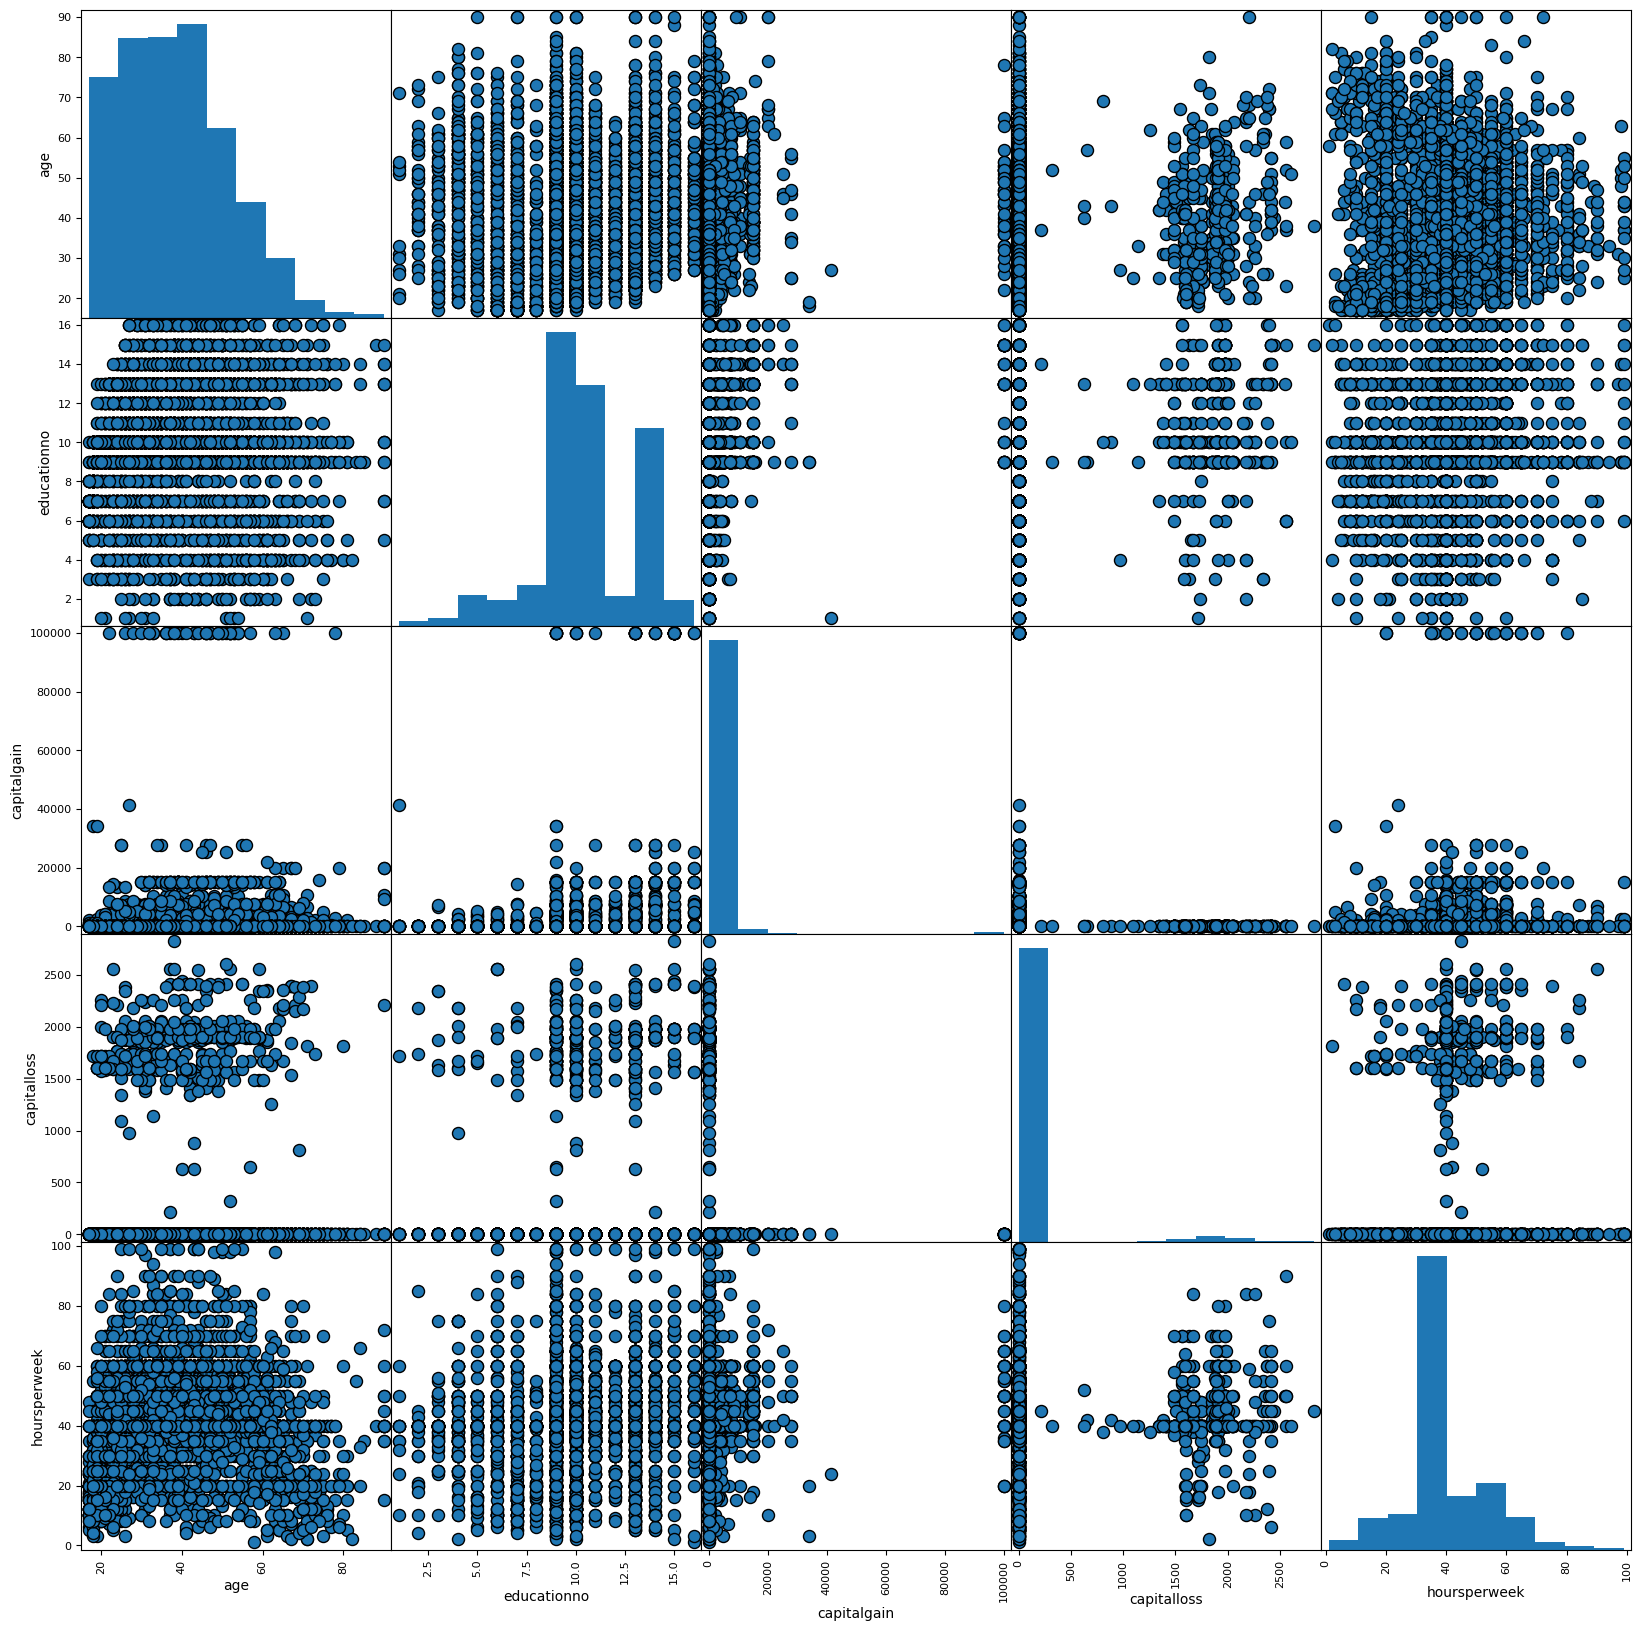

In [ ]:
pd.plotting.scatter_matrix(train,figsize= [20,20],diagonal='hist',alpha=1,s = 300,marker = '.',edgecolor= "black")
plt.show()

In [ ]:
occ_df = train.groupby(['occupation', 'workclass', 'Salary']).size().reset_index().rename(columns={0:'Num of Indv'})
occ_df_sort = occ_df.sort_values('Num of Indv', ascending=False)

Text(0.5, 1.01, 'Diff occupations with corresponding workclass')

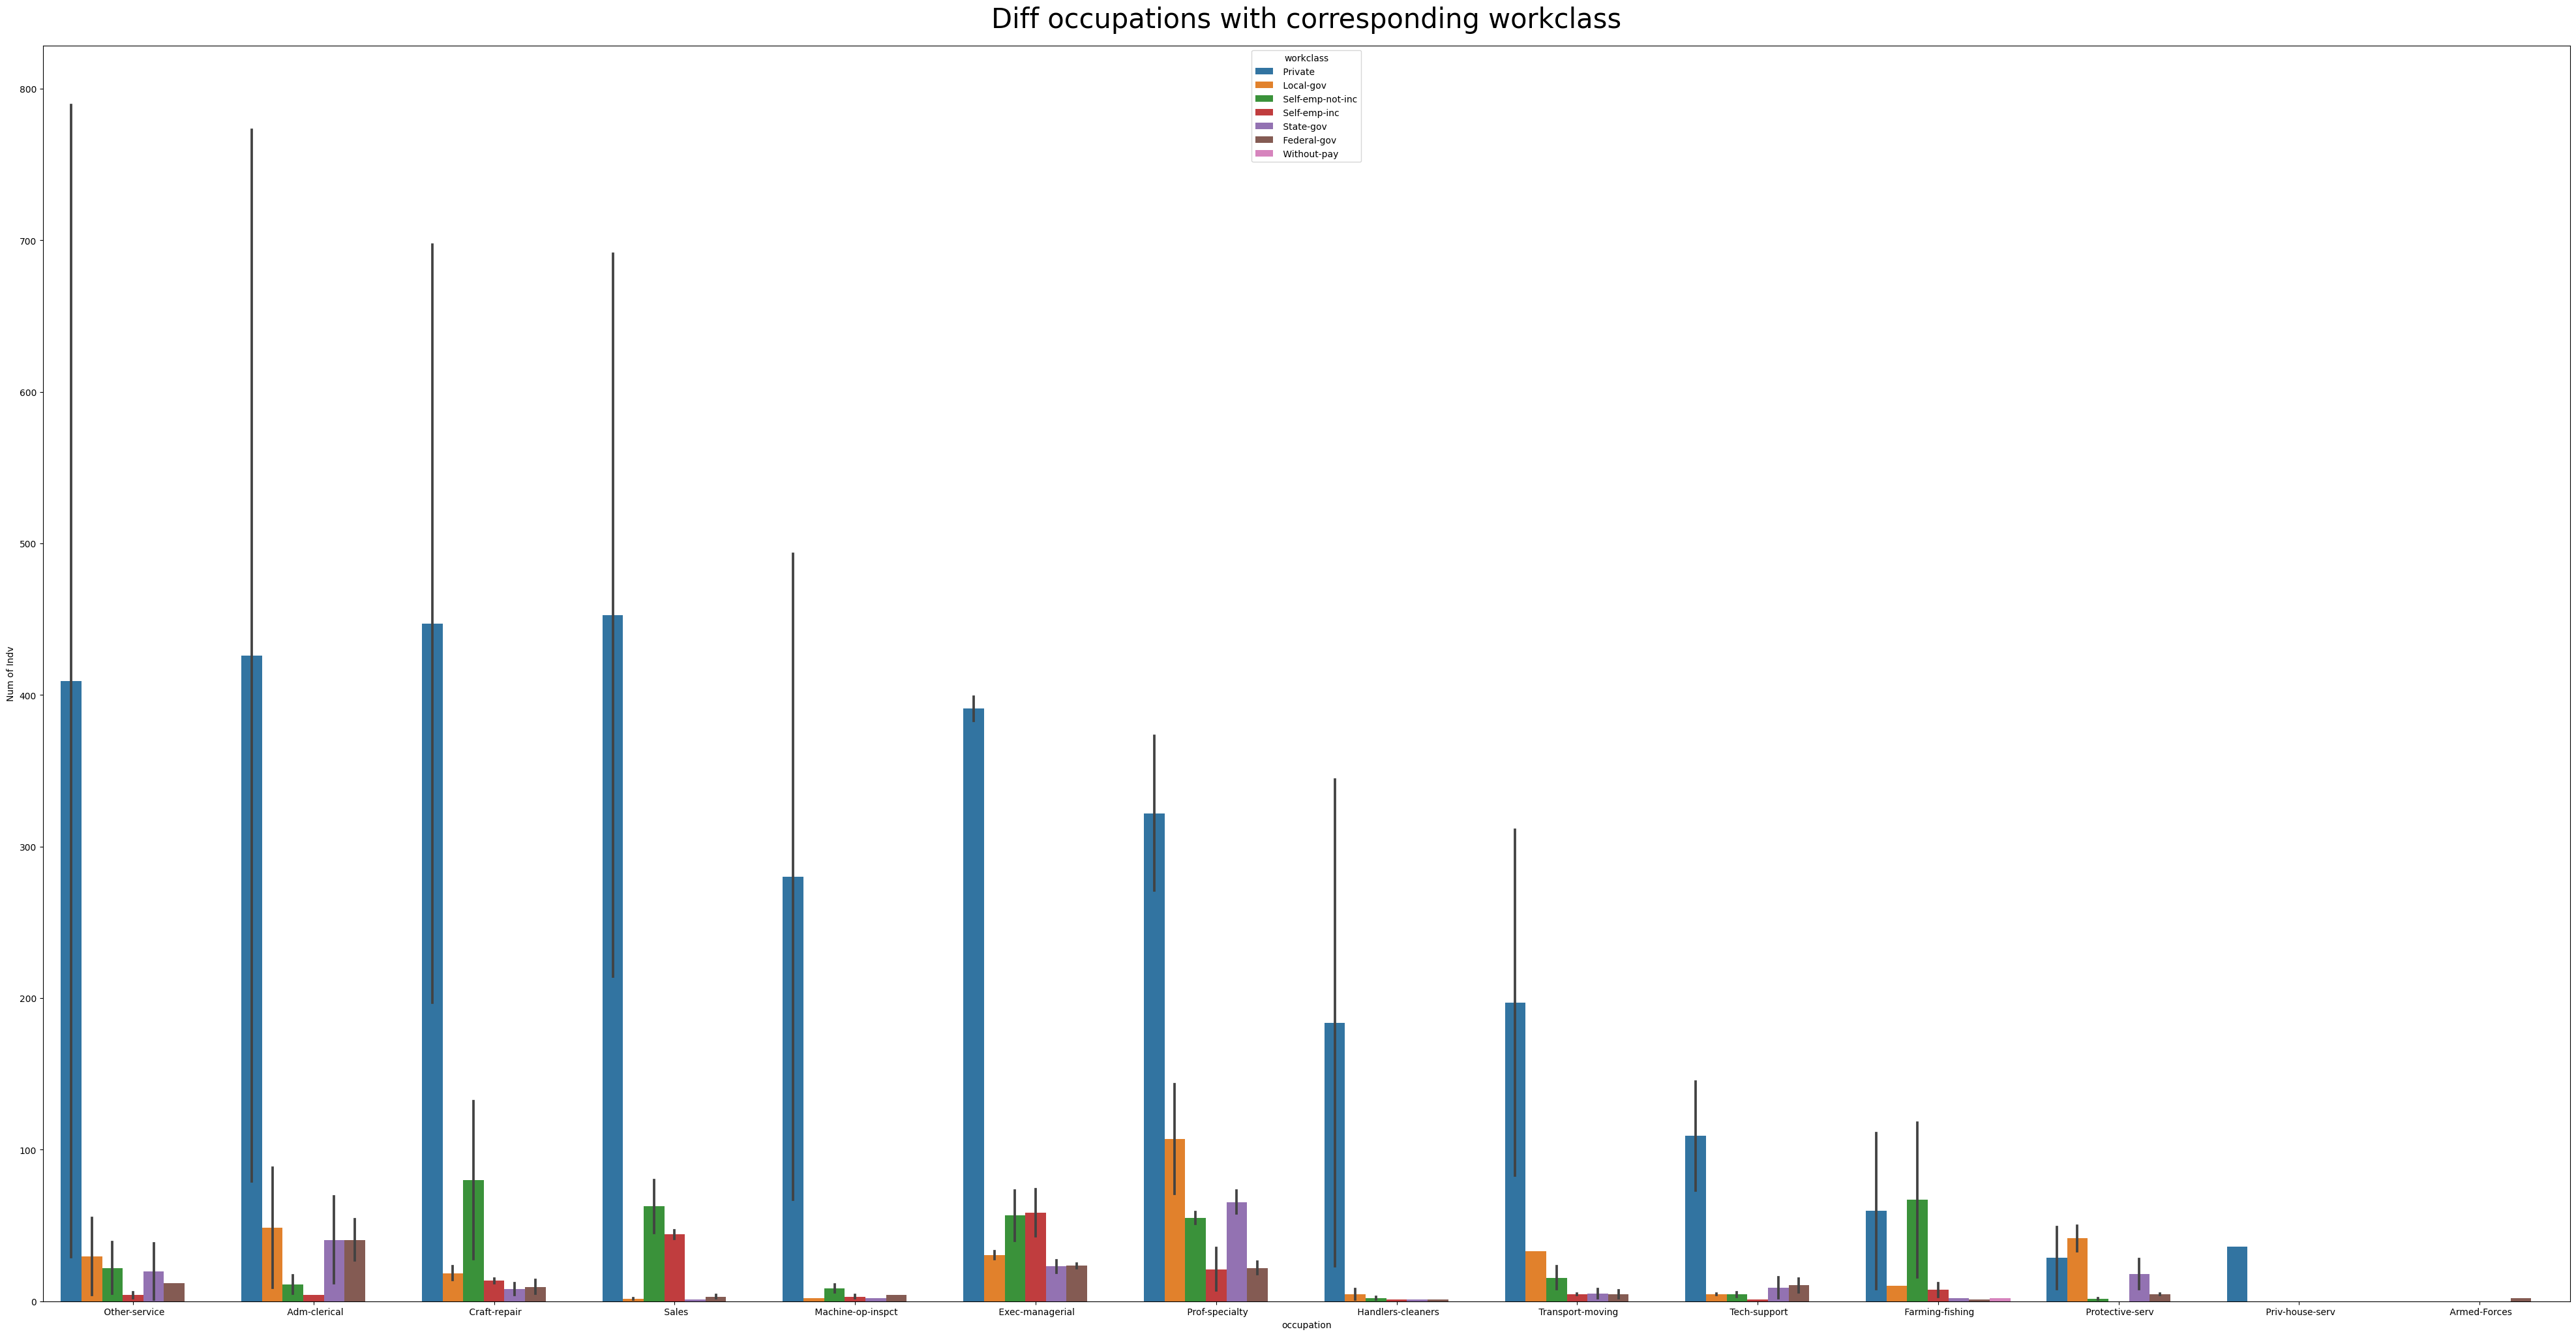

In [ ]:
plt.rcParams['figure.figsize']=(50,25)
sns.barplot(x='occupation', y = 'Num of Indv', hue='workclass', data=occ_df_sort)
plt.title("Diff occupations with corresponding workclass", y=1.01, fontsize=30)

In [ ]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [ ]:
number = LabelEncoder()
for i in string_columns:
        train[i]= number.fit_transform(train[i])
        test[i]=number.fit_transform(test[i])

In [ ]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0.0,40.0,37,<=50K
1,50,4,9,13,2,3,0,4,1,0.0,0.0,13.0,37,<=50K
2,38,2,11,9,0,5,1,4,1,0.0,0.0,40.0,37,<=50K
3,53,2,1,7,2,5,0,2,1,0.0,0.0,40.0,37,<=50K
4,28,2,9,13,2,9,5,2,0,0.0,0.0,40.0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8996,61,2,15,10,2,3,0,4,1,0.0,0.0,45.0,37,>50K
8997,24,2,9,13,4,9,1,4,0,0.0,0.0,40.0,37,<=50K
8998,29,2,15,10,4,0,3,4,0,0.0,0.0,40.0,37,<=50K
8999,17,2,0,6,4,4,3,4,1,0.0,0.0,40.0,37,<=50K


In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [ ]:
colnames = train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
x_train = train[colnames[0:13]]
y_train = train[colnames[13]]
x_test = test[colnames[0:13]]
y_test = test[colnames[13]]

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

SVM Models

In [ ]:
clf1=SVC(kernel='poly',gamma=0.001)

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 75.4316069057105


array([[11360,     0],
       [ 3700,     0]])

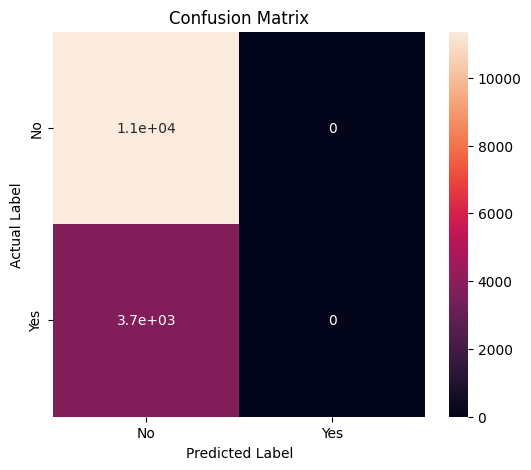

In [ ]:
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
plt.figure(figsize=(6, 5))
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
clf1=SVC(kernel='linear',gamma=0.01)

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 80.44488711819389


array([[11205,   155],
       [ 2790,   910]])

In [ ]:
clf1=SVC(kernel='rbf',gamma=0.001)

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 75.4316069057105


array([[11360,     0],
       [ 3700,     0]])

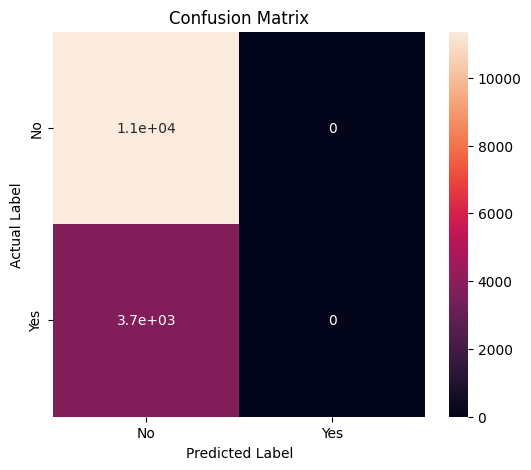

In [ ]:
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
plt.figure(figsize=(6, 5))
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [ ]:
clf1=SVC(kernel='rbf',gamma=0.0001,C=1)

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 75.4316069057105


array([[11360,     0],
       [ 3700,     0]])

From the used model the model with linear kernel and gamma = 0.001 is found to be more accurate to an extent of 80.98%